In [35]:
# Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# importing iris dataset from sklearn
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [12]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df['target'] = iris.target

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [24]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [25]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Visualization

In [28]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [32]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

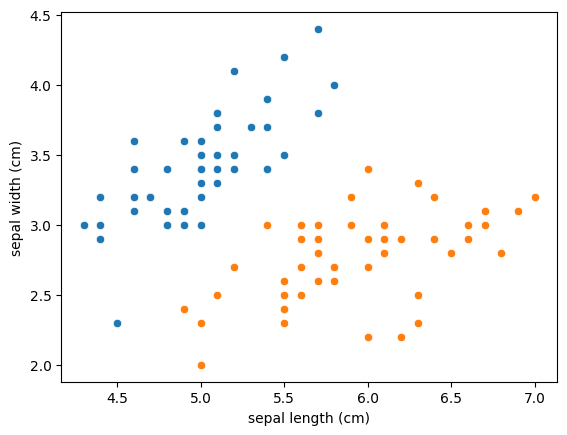

In [37]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)',data=df0)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)',data=df1)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

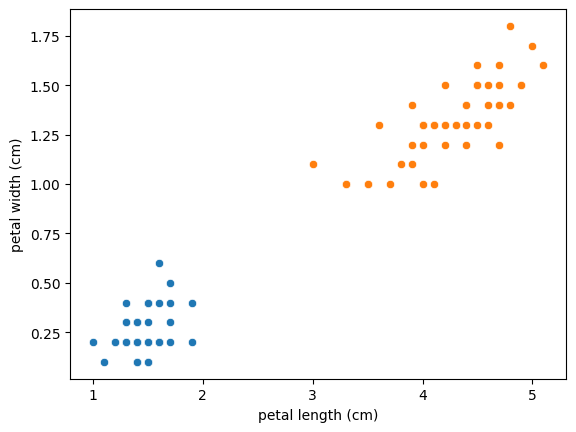

In [38]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)',data=df0)
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)',data=df1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['target','flower_name'],axis = 1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [46]:
X_train.shape

(120, 4)

In [47]:
X_test.shape

(30, 4)

In [48]:
from sklearn.svm import SVC

In [49]:
model = SVC()

In [50]:
model.fit(X_train,y_train)

SVC()

In [53]:
model.score(X_test,y_test)

0.9333333333333333

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
y_predict = model.predict(X_test)

In [57]:
cme = confusion_matrix(y_predict,y_test)
cme

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  7]])

<AxesSubplot:>

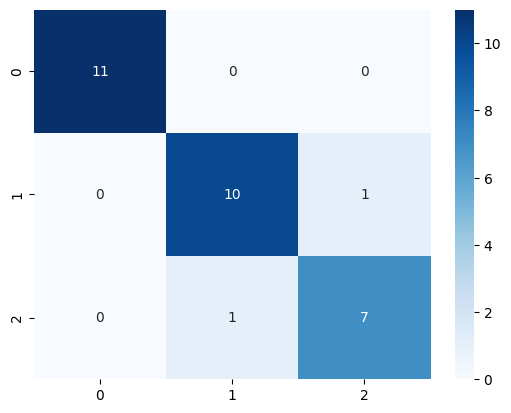

In [62]:
sns.heatmap(cme,annot = True,cmap='Blues')

In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

